In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
base = pd.read_csv('./final_test.csv')

In [6]:
base.shape

(119734, 4)

In [7]:
base.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [8]:
base.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


<AxesSubplot:ylabel='Frequency'>

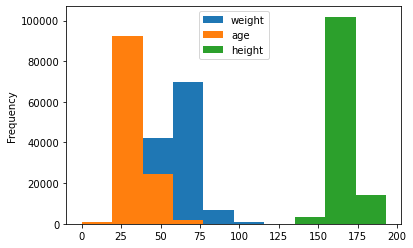

In [9]:
fig, ax = plt.subplots()
base.plot(kind='hist', ax=ax)

In [10]:
base.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [11]:
# First let's look at weight
base.weight.isna().sum()

0

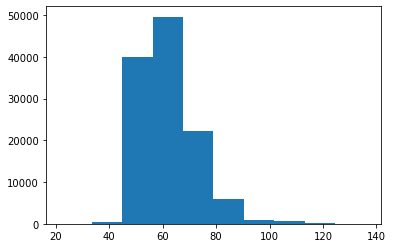

In [12]:
# ALmost a Normal Distribution
plt.hist(base.weight)
plt.show()

In [13]:
# Now lets look at Age. probably the most wrong data in our dataset (As people dont usually like to tell the real age)
base.age.isna().sum()

257

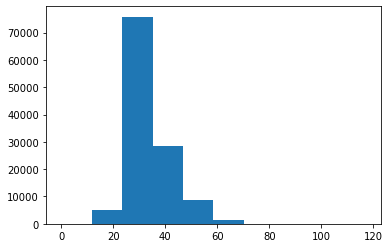

In [14]:
plt.hist(base.age,)
plt.show()

In [15]:
base.height.isna().sum()

330

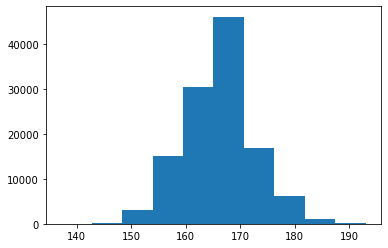

In [16]:
plt.hist(base.height)
plt.show()

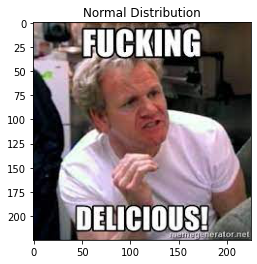

In [17]:
url = 'index.jpeg'
import matplotlib.image as mpimg
img = plt.imshow(mpimg.imread(url))
plt.title('Normal Distribution')
plt.show()

In [18]:
base['size'].dtype

dtype('O')

In [19]:
base['size'].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [20]:
# As we can see, we have *a lot* of data, so we can simply discard rows with null values -- Se if ther's better way to approach this.
incommon_rows = (base.age.isna() & base.height.isna()).sum()
rm_rows = base.age.isna().sum() + base.height.isna().sum() - incommon_rows
print(f'Number of removed rows: {rm_rows}')

Number of removed rows: 581


In [21]:
droped_base = base.dropna(axis=0)
droped_base.shape

(119153, 4)

In [22]:
droped_base.describe()

,weight,age,height
count,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.807068
std,9.942877,8.148302,6.737797
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [23]:
# Now we go to AI implementation
X = droped_base.iloc[:,:3]
y = droped_base.iloc[:,3]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3)

In [25]:
# First let's try with Simple Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

dtree_prev = model.predict(X_test)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [26]:
confusion_matrix(y_test, dtree_prev)

array([[1643, 1969,  226, 1064,    1,   19,  261],
       [1257, 5214, 1791,  489,    0,  176,   87],
       [ 207, 2078, 3242,   91,    0,  836,   20],
       [1340, 1026,  124, 2160,    1,   11, 1036],
       [   5,    5,    0,    6,    0,    0,   11],
       [  29,  329, 1432,    8,    0, 1128,    8],
       [ 351,  187,   29, 1174,    4,    9, 4662]])

In [27]:
dtree_acc = accuracy_score(y_test, dtree_prev)
dtree_acc

0.5049236278184972

In [28]:
# Very.. Very... Bad!
# The reason is simple: Decision Trees are not to good to using numeric values.

In [41]:
from sklearn.linear_model import RidgeClassifier
rdge_model = RidgeClassifier()
rdge_model.fit(X_train, y_train)
rdge_prev = rdge_model.predict(X_test)
rdge_prev[:5]

array(['M', 'XXXL', 'M', 'M', 'M'], dtype='<U4')

In [32]:
rdge_acc = accuracy_score(y_test, rdge_prev)
rdge_acc

0.4312930118055167

In [43]:
# Worse! But why?
# I think we should change our Y label... But first, lets try with NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_prev = gnb_model.predict(X_test)
gnb_prev[:5]

array(['M', 'XL', 'S', 'S', 'L'], dtype='<U4')

In [45]:
gnb_acc = accuracy_score(y_test, gnb_prev)
gnb_acc

0.4841940356963017

In [55]:
# Oh my Goood! Let's try again with something else...
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prev = knn_model.predict(X_test)
knn_prev[:5]

array(['M', 'L', 'M', 'L', 'L'], dtype=object)

In [56]:
knn_acc = accuracy_score(y_test, knn_prev)
knn_acc

0.48313097969003527

In [57]:
# Lets try one more, just to be shure
from sklearn.ensemble import RandomForestClassifier
rndf_model = RandomForestClassifier()
rndf_model.fit(X_train, y_train)
rndf_prev = rndf_model.predict(X_test)
rndf_prev[:5]

array(['M', 'XL', 'M', 'M', 'L'], dtype=object)

In [58]:
rndf_acc = accuracy_score(y_test, rndf_prev)
rndf_acc

0.5111341129077379

Whatt Every Metric are low! Why tho?

In [59]:
base.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [62]:
droped_base['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [65]:
# Lets separate this vlaues into an Hierarch ideia
['XXS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL']
base['size'].loc[base['size'] == 'XXL']

array(['XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL',
       'XXL', 'XXL', 'XXL', 'XXL', 'XXL', 'XXL'], dtype=object)

In [68]:
ageless = droped_base.drop('age', 1)

ageless_X = ageless.iloc[:,:2]
ageless_y = ageless.iloc[:,2]

ageless_X_train, ageless_X_test, ageless_y_train, ageless_y_test = train_test_split(ageless_X, ageless_y, train_size=.3)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_ageless_model = KNeighborsClassifier()
knn_ageless_model.fit(ageless_X_train, ageless_y_train)
knn_ageless_prev = knn_ageless_model.predict(ageless_X_test)
knn_ageless_prev[:5]

array(['XL', 'M', 'M', 'S', 'S'], dtype=object)

In [74]:
knn_ageless_acc = accuracy_score(ageless_y_test, knn_ageless_prev)
knn_ageless_acc

0.4329920391329369

In [ ]:
# Still with bad results :(